In [2]:
import json
import pandas as pd


file = "web_dev_simplified.json" #Loading file onto Jupyter
data = None                      #Setting the data to be initially nothing
with open(file, 'r') as f:       #reading file nd loading it onto the data variable
    
    data = json.load(f)
    
channel_id, stats = data.popitem()
print (channel_id)
channel_stats = stats["channel_statistics"]
video_stats = stats["video_data"]

UCFbNIlppjAuEX4znoulh0Cw


In [3]:
#Testing to see if the channel statistics do match with the ones in the json file - extracted from the Youtube channel itself
print('views', channel_stats['viewCount'])
print('subscriber', channel_stats['subscriberCount'])
print('videos', channel_stats['videoCount'])

views 25992149
subscriber 517000
videos 301


In [13]:
#Performing the video statistics. I think it still, is, quite a challenge for me to identify and understand what tools/ methods and functions to use to call what. However, at the end of all of this, I am going to look through this file and make sense of all this stuff. I am, actually, going to try this again on my own - performing a similar analysis on my own channel with comments and shit to make sense of everything.
sorted_videos = sorted(video_stats.items(), key = lambda item: int(item[1]['viewCount']),reverse = True)

stats = []
for vid in sorted_videos:
    video_id = vid[0]
    title = vid[1]["title"]
    views = int(vid[1]["viewCount"])
    likes = int(vid[1]["likeCount"])
    dislike = int(vid[1]["dislikeCount"])
    comment = int(vid[1]["commentCount"])
    
    stats.append([title, views, likes, dislike, comment])

In [14]:
#Putting that into a pandas dataframe for further analysis
df = pd.DataFrame(stats, columns = ["title", "views", "likes", "dislike", "comment"])

#See the first twenty items in the dataframe
df.head(20)

,title,views,likes,dislike,comment
0,Learn JSON in 10 Minutes,1118026,36729,471,1297
1,Build Real Time Face Detection With JavaScript,928701,36361,830,1533
2,Learn CSS Position In 9 Minutes,721201,33104,363,1189
3,Junior Vs Senior Code - How To Write Better Code,657001,19975,1277,1786
4,JavaScript Promises In 10 Minutes,643636,22076,311,972
5,I Challenged The CSS King To A CSS Battle,530507,15314,283,1119
6,8 Must Know JavaScript Array Methods,484923,21241,202,613
7,Build A Calculator With JavaScript Tutorial,445708,13871,202,1031
8,How To Create A Video Chat App With WebRTC,421830,15865,182,1552
9,Node.js Passport Login System Tutorial,416933,10283,236,889


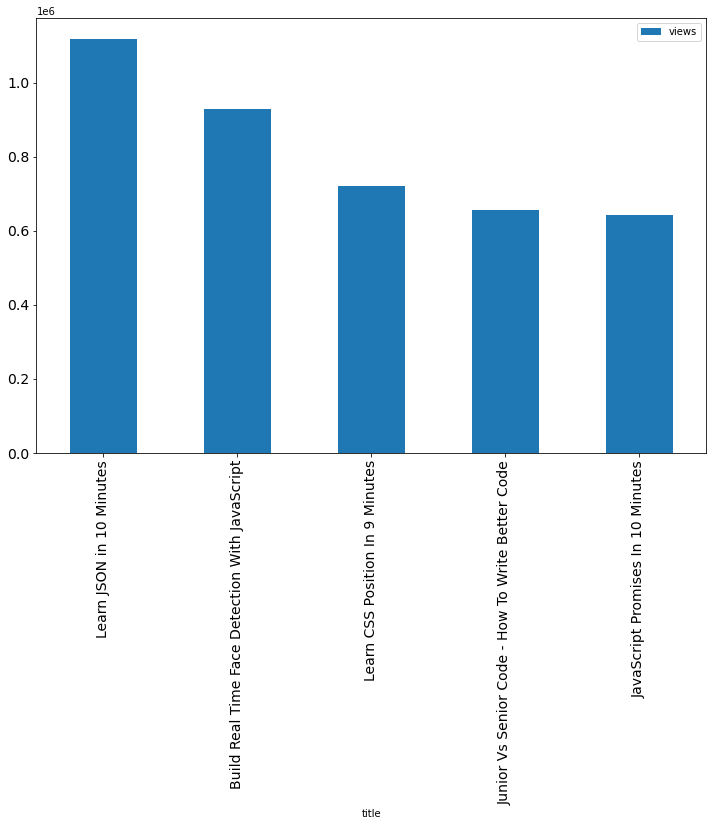

In [19]:
top5 = df.head(5)
ax = top5.plot.bar(x = "title", y = "views", figsize = (12,8), fontsize = 14)

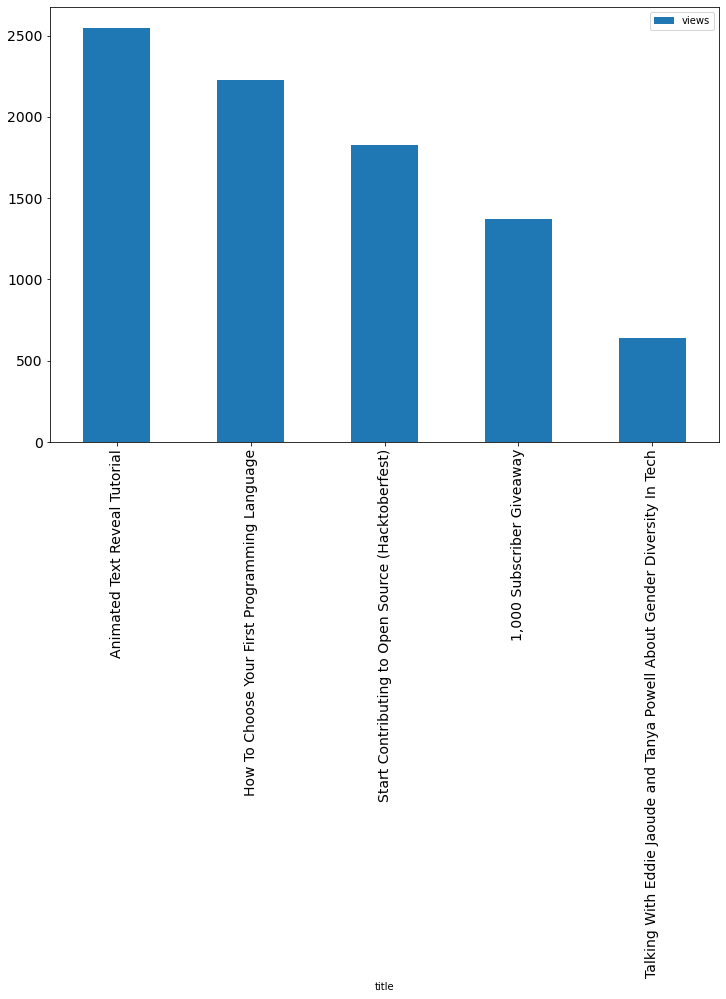

In [18]:
bottom5 = df.tail(5)
ax = bottom5.plot.bar(x = "title", y = "views", figsize = (12,8), fontsize = 14)

In [21]:
#Likes vs dislikes
likes_average_top_5 = top5['likes'].mean()
dislike_average_top_5 = top5['dislike'].mean()
comment_average_top_5 = top5['comment'].mean()

print(likes_average_top_5, dislike_average_top_5, comment_average_top_5)

29649.0 650.4 1355.4


In [22]:
#Likes vs dislikes
likes_average_bottom_5 = bottom5['likes'].mean()
dislike_average_bottom_5 = bottom5['dislike'].mean()
comment_average_bottom_5 = bottom5['comment'].mean()

print(likes_average_bottom_5, dislike_average_bottom_5, comment_average_bottom_5)

69.6 2.8 24.4
